/Users/slee/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


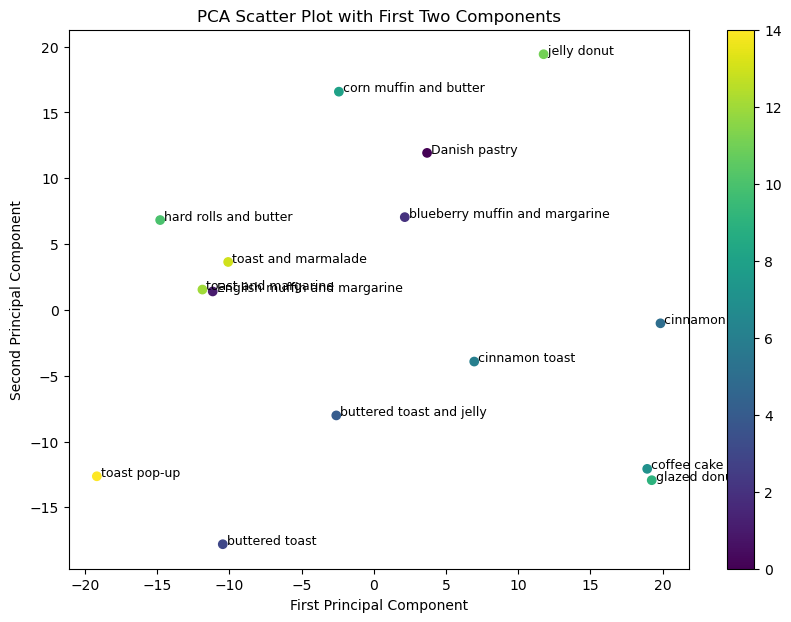

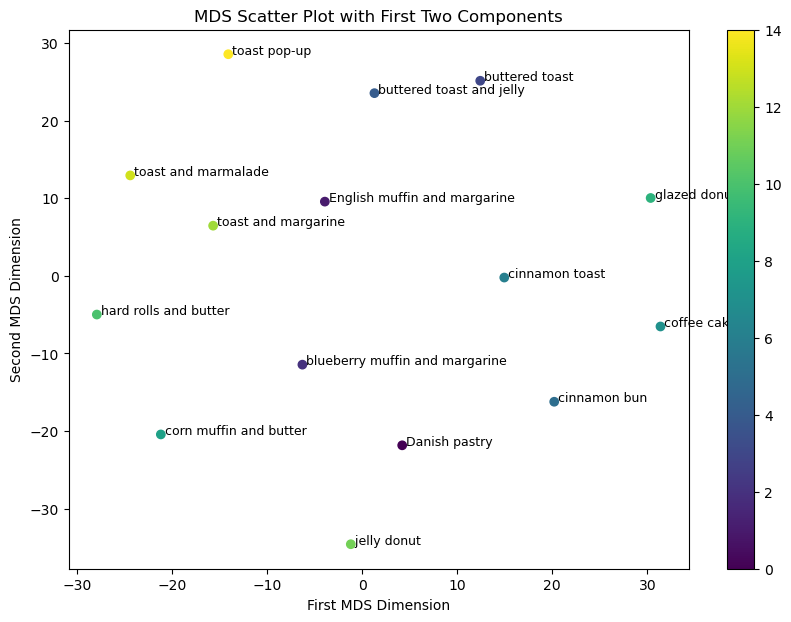

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("Breakfast.csv")

# Assuming the first column is the label and the rest are features
y = data.iloc[:, 0]     # Labels (First column)
X = data.iloc[:, 1:]    # Features (Remaining columns)

# If the labels are categorical, we need to convert them to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Perform MDS to reduce to 2 components
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X)

# Create a PCA scatter plot
plt.figure(figsize=(10, 7))
scatter_pca = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_encoded, cmap='viridis')
plt.title('PCA Scatter Plot with First Two Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Adding labels for PCA plot
for i, label in enumerate(y):
    plt.text(pca_result[i, 0], pca_result[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_pca)
plt.show()

# Create an MDS scatter plot
plt.figure(figsize=(10, 7))
scatter_mds = plt.scatter(mds_result[:, 0], mds_result[:, 1], c=y_encoded, cmap='viridis')
plt.title('MDS Scatter Plot with First Two Components')
plt.xlabel('First MDS Dimension')
plt.ylabel('Second MDS Dimension')

# Adding labels for MDS plot
for i, label in enumerate(y):
    plt.text(mds_result[i, 0], mds_result[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_mds)
plt.show()